Since Plotly graphs can be embedded in HTML or exported as a static image, you can embed Plotly graphs in reports suited for print and for the web. This notebook is a primer on creating PDF reports with Python from HTML with Plotly graphs. This notebook uses:
- [Plotly](https://plot.ly/python/) for interactive, web native graphs
- [IPython Notebook](https://plot.ly/ipython-notebooks) to create this notebook, combining text, HTML, and Python code
- [xhtml2pdf](https://github.com/chrisglass/xhtml2pdf/tree/master/doc) to convert HTML to PDF in Python

Run `! pip install xhtml2pdf` in the Terminal to install the `xhtml2pdf` package.

#### Create the HTML Template
First choose the plots that you'd like to add to the report.

In [1]:
graphs = ['https://plot.ly/~christopherp/308',
          'https://plot.ly/~christopherp/306',
          'https://plot.ly/~christopherp/300',
          'https://plot.ly/~christopherp/296']

In [2]:
from IPython.display import display, HTML

def report_block_template(report_type, graph_url, caption=''):
    if report_type == 'interactive':
        graph_block = '<iframe style="border: none;" src="{graph_url}.embed" width="100%" height="600px"></iframe>'
    elif report_type == 'static':
        graph_block = (''
            '<a href="{graph_url}" target="_blank">' # Open the interactive graph when you click on the image
                '<img style="height: 400px;" src="{graph_url}.png">'
            '</a>')

    report_block = ('' +
        graph_block + 
        '{caption}' + # Optional caption to include below the graph
        '<br>'      + # Line break
        '<a href="{graph_url}" style="color: rgb(190,190,190); text-decoration: none; font-weight: 200;" target="_blank">'+ 
            'Click to comment and see the interactive graph' + # Direct readers to Plotly for commenting, interactive graph
        '</a>' + 
        '<br>' + 
        '<hr>') # horizontal line                       

    return report_block.format(graph_url=graph_url, caption=caption)


interactive_report = ''
static_report = ''

for graph_url in graphs:
    _static_block = report_block_template('static', graph_url, caption='')
    _interactive_block = report_block_template('interactive', graph_url, caption='')

    static_report += _static_block
    interactive_report += _interactive_block

#### Display the Interactive Report 

This version, suited for the web, contains the interactive version of the Plotly graphs, served from Plotly's server.

In [3]:
display(HTML(interactive_report))

#### Display the Static Report
This version is easy to convert to PDF. It contains the static version of the Plotly graphs, also served from Plotly's server.

In [4]:
display(HTML(static_report))

In [17]:
import xhtml2pdf
from xhtml2pdf import pisa

ImportError: cannot import name inputstream

### Part 2 - Convert the HTML to PDF with `xhtml2pdf`

In [6]:
from xhtml2pdf import pisa

# Utility function
def convert_html_to_pdf(source_html, output_filename):
    # open output file for writing (truncated binary)
    result_file = open(output_filename, "w+b")

    # convert HTML to PDF
    pisa_status = pisa.CreatePDF(
            source_html,                # the HTML to convert
            dest=result_file)           # file handle to recieve result

    # close output file
    result_file.close()                 # close output file

    # return True on success and False on errors
    return pisa_status.err

convert_html_to_pdf(static_report, 'report.pdf')

! open report.pdf

ImportError: cannot import name inputstream

#### Generating Images *on the fly*

The static report in the example above uses graphs that were already created in Plotly. Sometimes it's helpful to use graph images that are created on-the-fly. For example, if you're using [plotly.js](https://plot.ly/javascript-graphing-library) to create the web-reports you might not be saving the graphs to accounts on [plot.ly](https://plot.ly).

To create static images of graphs on-the-fly, use the `plotly.plotly.image` class. This class generates images by making a request to the Plotly image server.

Here's an alternative template that uses `py.image.get` to generate the images and template them into an HTML and PDF report.


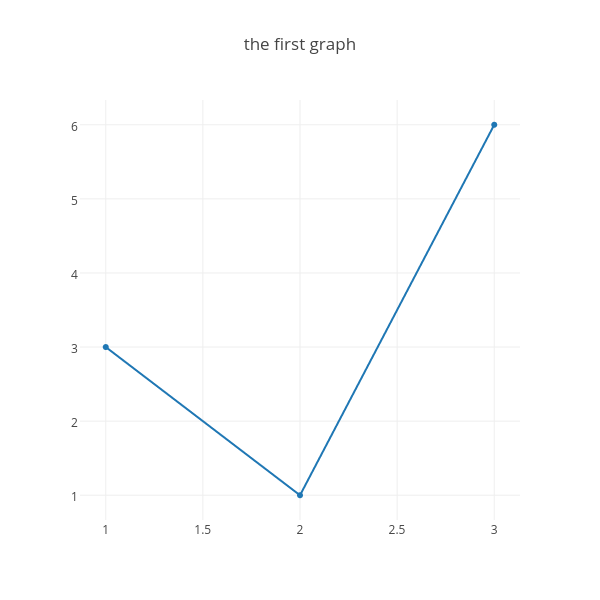
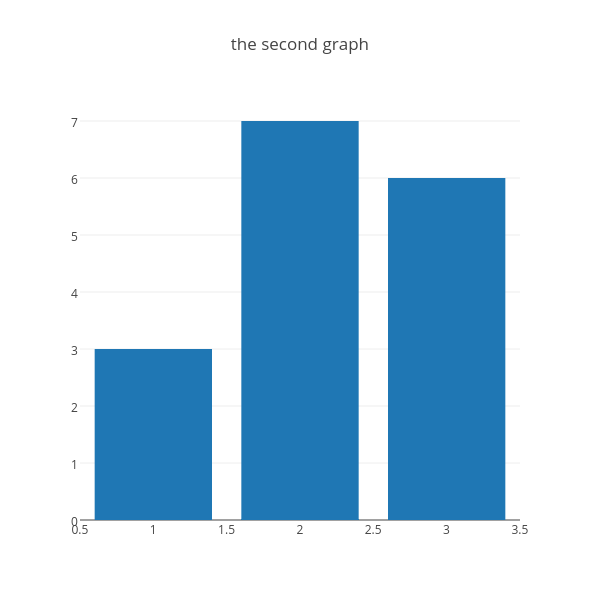

0

In [9]:
import plotly.plotly as py
import base64

width = 600
height = 600

template = (''
    '<img style="width: {width}; height: {height}" src="data:image/png;base64,{image}">' 
    '{caption}'                              # Optional caption to include below the graph
    '<br>'
    '<hr>'
'')

# A collection of Plotly graphs
figures = [
    {'data': [{'x': [1,2,3], 'y': [3,1,6]}], 'layout': {'title': 'the first graph'}},
    {'data': [{'x': [1,2,3], 'y': [3,7,6], 'type': 'bar'}], 'layout': {'title': 'the second graph'}}
]

# Generate their images using `py.image.get`
images = [base64.b64encode(py.image.get(figure, width=width, height=height)).decode('utf-8') for figure in figures]

report_html = ''
for image in images:
    _ = template
    _ = _.format(image=image, caption='', width=width, height=height)
    report_html += _

display(HTML(report_html))
convert_html_to_pdf(report_html, 'report-2.pdf')

### Learn more
- Questions? <support@plot.ly>
- [Getting started with Plotly and Python](https://plot.ly/python/getting-started)
- [Updating Plotly graphs with Python and cron jobs](http://moderndata.plot.ly/update-plotly-charts-with-cron-jobs-and-python/)
- [Using Plotly offline in IPython notebooks](https://plot.ly/python/offline)
- [Generate HTML reports with Python, Pandas, and Plotly](http://moderndata.plot.ly/generate-html-reports-with-python-pandas-and-plotly/)
- [Emailing Plotly graphs with Python](https://plot.ly/python/email-reports/)
- [Edit this tutorial](https://github.com/plotly/documentation/tree/gh-pages)

In [2]:
! pip install publisher --upgrade

from IPython.display import HTML, display

display(HTML('<link href="//fonts.googleapis.com/css?family=Open+Sans:600,400,300,200|Inconsolata|Ubuntu+Mono:400,700" rel="stylesheet" type="text/css" />'))
display(HTML('<link rel="stylesheet" type="text/css" href="https://help.plot.ly/documentation/all_static/css/ipython-notebook-custom.css">'))

! pip install git+https://github.com/plotly/publisher.git --upgrade
import publisher
publisher.publish('pdf-reports.ipynb', 'python/pdf-reports/', 'PDF Reports'
                  'How to make PDF reports with Python and Plotly Graphs.',
                  title = 'Python PDF Reports | plotly',
                  name = 'PDF Reports',
                  has_thumbnail='true', thumbnail='thumbnail/ipython_10_pdf_report.jpg', 
                  language='python', page_type='example_index',
                  display_as='report_generation', order=1)

Requirement already up-to-date: publisher in /Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages
